In [1]:
import pandas as pd

# Step 1: Load the CSV
df = pd.read_csv("Netflix_shows_movies.csv", encoding="utf-8")

# Step 2: Check the shape (rows, columns)
print("Shape:", df.shape)

# Step 3: View the first 5 rows
print(df.head())

# Step 4: Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Step 5: Save a working copy (still named the same)
df.to_csv("Netflix_shows_movies.csv", index=False)

Shape: (6234, 12)
    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  rel

In [2]:
# Replace missing text with "Unknown"
text_cols = ['director', 'cast', 'country']
df[text_cols] = df[text_cols].fillna("Unknown")

# Replace missing rating with "Not Rated"
df['rating'] = df['rating'].fillna("Not Rated")

# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Remove leading/trailing spaces from all text columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [3]:
print(df.isnull().sum())  # Should be 0 for text columns & rating
print(df.dtypes)          # Check date_added is now datetime64

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added      651
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64
show_id                  int64
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object


In [4]:
df.to_csv("Netflix_shows_movies_cleaned.csv", index=False)
print("Cleaned dataset saved as Netflix_shows_movies_cleaned.csv")

Cleaned dataset saved as Netflix_shows_movies_cleaned.csv


In [7]:
import pandas as pd

# Load cleaned data
df = pd.read_csv("Netflix_shows_movies_cleaned.csv", parse_dates=['date_added'])

# View the shape of the dataset
print("Shape:", df.shape)

# See the list of columns
print("\nColumns:", df.columns.tolist())

# Check overall info about the dataset
print("\nData Info:")
print(df.info())

# Get descriptive statistics for numeric columns
print("\nNumeric Summary:")
print(df.describe())

# Count how many Movies vs TV Shows
print("\nContent Type counts:")
print(df['type'].value_counts())

# View the distribution of ratings
print("\nRatings distribution:")
print(df['rating'].value_counts())

# Split multi-genre entries, strip spaces, and count top 10 genres
genres = df['listed_in'].str.split(',').explode().str.strip()
print("\nTop 10 Genres:")
print(genres.value_counts().head(10))


Shape: (6234, 12)

Columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director      6234 non-null   object        
 4   cast          6234 non-null   object        
 5   country       6234 non-null   object        
 6   date_added    5583 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6234 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
 11  description   6234 non-null   object        
dtypes: datet

In [9]:
!pip install matplotlib seaborn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.6 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.1 MB 1.8 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.1 MB 1.8 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 1.6 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.1 MB 1.6 MB/s eta 0:00:05
   --------- ------------------------------ 1.8/8.1 MB 1.2 MB/s eta 0:00:06
   ---------- ----------------------------- 2.1/8.1 MB 1.3 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.3 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.3 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.1 MB/s eta 0:00:06
   ----------- ---------------------------- 2.4/8.1 MB 1.1 MB/s eta 0:00:06
   ------------ ----------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


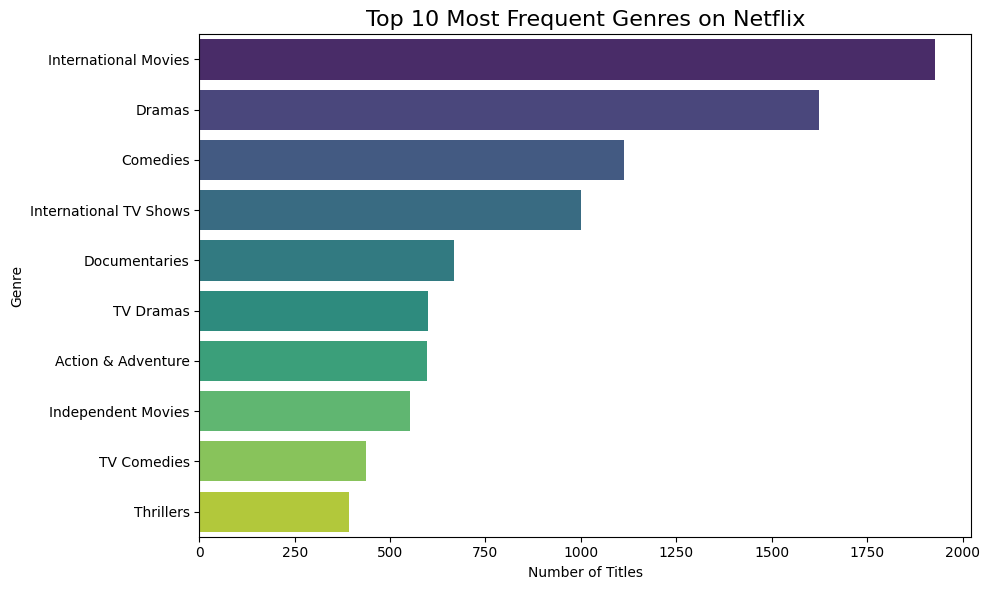

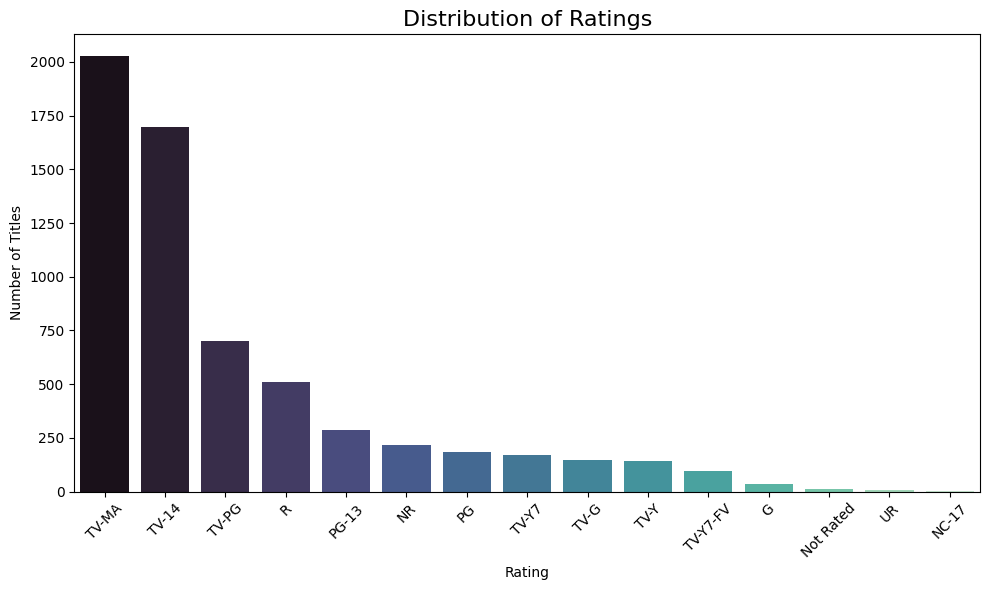

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("Netflix_shows_movies_cleaned.csv", parse_dates=['date_added'])

# --- Chart 1: Most watched (most frequent) genres ---

# Split the 'listed_in' column into individual genres
genres = df['listed_in'].str.split(',').explode().str.strip()

# Count each genre and select the top 10
top_genres = genres.value_counts().head(10)

# Plot top genres (horizontal bar chart)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis", hue=top_genres.index, legend=False)
plt.title("Top 10 Most Frequent Genres on Netflix", fontsize=16)
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


# --- Chart 2: Ratings distribution ---

# Count how many titles fall into each rating
rating_counts = df['rating'].value_counts()

# Plot ratings distribution (vertical bar chart)
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="mako", hue=rating_counts.index, legend=False)
plt.title("Distribution of Ratings", fontsize=16)
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()